In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from preprocess import *

plt.rcParams['pcolor.shading']= 'auto'

In [2]:
def make_bins(*arrs):
    bins = []
    for arr in arrs:
        bins.append((arr[1:]+ arr[:-1])/2)
    return bins

def prettify_cols(df):
    cols = list(df.columns)
    for i in range(len(cols)):
        col = cols[i]
        if col[0] != '#':
            continue
        col = col[1:]
        cols[i] = col
    df.columns= cols
    return None


In [3]:
folder_name = '2021_08_02_tpx/'

In [4]:
preprocess(folder_name + 'data_4real30mins_060V045V_000000_cent.csv',
           'test.csv',
           folder_name + 'data_4real30mins_060V045V_000000_TDC2.csv',
          )

This will write over test.csv! Continue? y/ny
Extracted Trigger IDs


FileNotFoundError: [Errno 2] No such file or directory: '2021_08_02_tpx/data_4real30mins_060V045V_000000_cent.csv2021_08_02_tpx/data_4real30mins_060V045V_000000_cent_trig_id.csv'

In [156]:
#preprocess(folder_name + 'data_5real30mins_080V060V_000000_cent.csv',
#          'test.csv',
#          folder_name + 'data_5real30mins_080V060V_000000_TDC2.csv')

This will write over test.csv! Continue? y/ny
Extracted Trigger IDs
Line 0 read.
Line 100_000 read.
Line 200_000 read.
Line 300_000 read.
Line 400_000 read.
Line 500_000 read.
Line 600_000 read.
Line 700_000 read.
Line 800_000 read.
Line 900_000 read.
Line 1_000_000 read.
Line 1_100_000 read.
Line 1_200_000 read.
Line 1_300_000 read.
Line 1_400_000 read.
Line 1_500_000 read.
Line 1_600_000 read.
Line 1_700_000 read.
Line 1_800_000 read.
Line 1_900_000 read.
Line 2_000_000 read.
Line 2_100_000 read.
Line 2_200_000 read.
Line 2_300_000 read.
Line 2_400_000 read.
num_lines: 2_471_349
num_batches: 1_351_663
many_electron_counter: 698_918
unphysical_counter: 150_636


In [47]:
698918/(698918+1351663)

0.3408390109924943

In [5]:
df_60 = pd.read_csv('test.csv')

In [29]:
df_80 = pd.read_csv('80.csv')

In [372]:
from scipy.signal import convolve2d

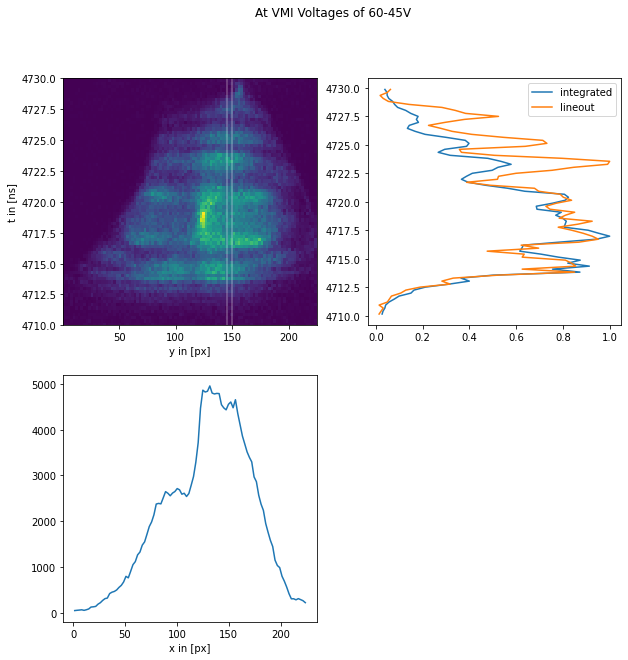

In [6]:
hist,bin_x,bin_t = np.histogram2d(df_60.cent_Y,df_60.delta_t,
                                  bins=(100,np.linspace(4710,4730,77)))
bin_x,bin_t = make_bins(bin_x,bin_t)
hist = hist.T
fig = plt.figure(figsize=(10,10))
fig.suptitle('At VMI Voltages of 60-45V')

plt.subplot(221)
plt.pcolor(bin_x,bin_t,hist)
plt.axvline(145,color='white',alpha=0.3)
plt.axvline(150,color='white',alpha=0.3)


plt.xlabel('y in [px]')
plt.ylabel('t in [ns]')

plt.subplot(223)
plt.plot(bin_x,hist.sum(axis=0))
plt.xlabel('x in [px]')
#plt.plot(hist_avg.sum(axis=0))

plt.subplot(222)
int_max = hist.sum(axis=1).max()
lineout_max = hist[:,64:66].sum(axis=1).max()
plt.plot(hist.sum(axis=1)/int_max,bin_t,label='integrated')
plt.plot(hist[:,64:66].sum(axis=1)/lineout_max,bin_t,label='lineout')
plt.legend()
#plt.plot(hist_avg.sum(axis=1))
#plt.savefig('60-45-y.png')
plt.show()

In [132]:
np.where((bin_x>145) & (bin_x<150) )

(array([64, 65, 66]),)

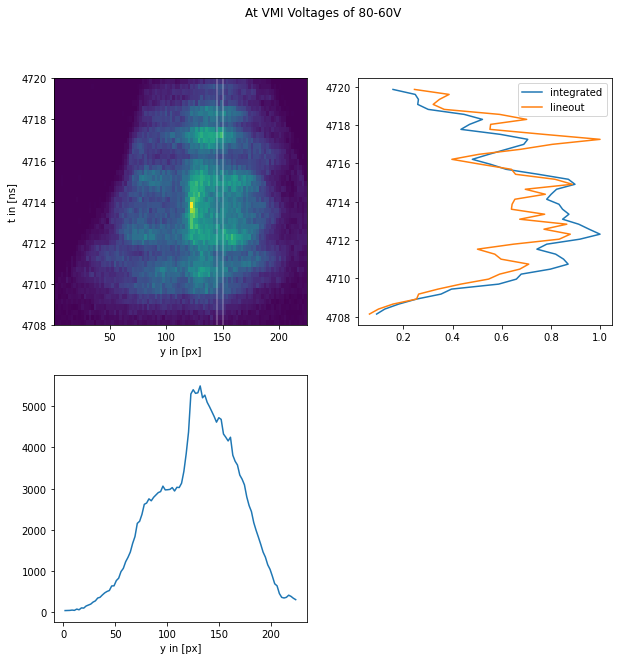

In [142]:
hist,bin_x,bin_t = np.histogram2d(df_80.cent_Y,df_80.delta_t,
                                  bins=(100,np.linspace(4708,4720,47)))
bin_x,bin_t = make_bins(bin_x,bin_t)
hist = hist.T
fig = plt.figure(figsize=(10,10))
fig.suptitle('At VMI Voltages of 80-60V')

plt.subplot(221)
plt.pcolor(bin_x,bin_t,hist)
plt.xlabel('y in [px]')
plt.ylabel('t in [ns]')
plt.axvline(145,color='white',alpha=0.3)
plt.axvline(150,color='white',alpha=0.3)

plt.subplot(223)
plt.plot(bin_x,hist.sum(axis=0))
plt.xlabel('y in [px]')
#plt.plot(hist_avg.sum(axis=0))

plt.subplot(222)

int_max = hist.sum(axis=1).max()
lineout_max = hist[:,64:66].sum(axis=1).max()
plt.plot(hist.sum(axis=1)/int_max,bin_t,label='integrated')
plt.plot(hist[:,64:66].sum(axis=1)/lineout_max,bin_t,label='lineout')
plt.legend()
#plt.savefig('80-60-y.png')
plt.show()

In [59]:
df_600 = pd.read_csv(folder_name+'data_ele_vert_1_600V450V_10mins_W0057_H07-210802-204316-1_cent.csv')
prettify_cols(df_600)
df_600.drop_duplicates(subset=['TrigId'],keep=False,inplace=True)

<AxesSubplot:>

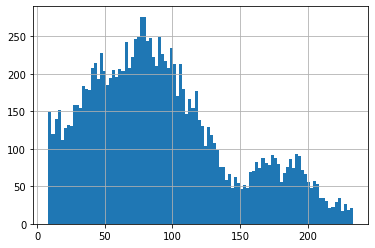

In [363]:
df_60.cent_X.hist(bins=100)

In [320]:
len(trig_id_list)

1814764